In [1]:
%matplotlib inline
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cubedsphere as cs

In [2]:
# get gamap's WhGrYlRd color scheme from file
from matplotlib.colors import ListedColormap
WhGrYlRd_scheme = np.genfromtxt('colormap/WhGrYlRd.txt',delimiter=' ')
WhGrYlRd = ListedColormap(WhGrYlRd_scheme/255.0)

In [3]:
datadir = ("/n/home03/zhuangjw/seasasfs/fromPleiades/output_FV3/"
            "C48/C48L20/")

ds = cs.open_FV3data(datadir,"tracer_daily")
ds

<xarray.Dataset>
Dimensions:  (pfull: 20, phalf: 21, tile: 6, time: 8, x: 48, x_b: 49, y: 48, y_b: 49)
Coordinates:
  * x        (x) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
  * y        (y) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
  * pfull    (pfull) float64 7.673 47.07 100.7 152.7 204.4 255.8 307.2 358.6 ...
  * phalf    (phalf) float64 1.0 26.0 77.26 128.5 179.8 231.1 282.3 333.6 ...
  * time     (time) float64 9.0 10.0 11.0 12.0 13.0 14.0 15.0 16.0
    lon      (tile, y, x) float32 305.783 307.37 308.986 310.631 312.306 ...
    lat      (tile, y, x) float32 -34.8911 -35.5988 -36.2858 -36.951 ...
  * x_b      (x_b) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * y_b      (y_b) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
    lon_b    (tile, y_b, x_b) float32 305.0 306.573 308.174 309.805 311.465 ...
    lat_b    (tile, y_b, x_b) float32 -35.2644 -35.9889 -36.6926 -37.3743 ...
    area     (tile, y, x) float32 2.

(0, 90)

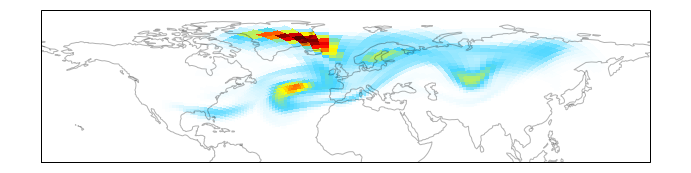

In [4]:
fig = plt.figure(figsize=[12,8])
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(alpha=0.3)

cs.plotCS( ds["plume01"].isel(time=7).mean(dim="pfull"),ds,ax,cmap=WhGrYlRd)

ax.set_ylim([0,90])

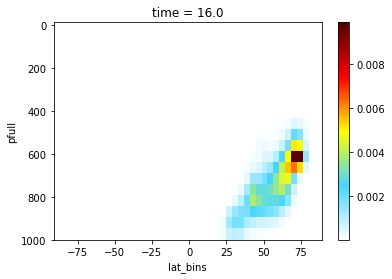

In [5]:
#plt.figure(figsize=(12,4))
#ds["plume01"].isel(time=7).cs.meridional_mean().plot(cmap="jet",yincrease=False)

cs.zonal_mean(ds["plume01"].isel(time=7)).plot(yincrease=False,cmap=WhGrYlRd)

In [2]:
def extract_max(logfile,varname,step=48):
    with open(logfile,"r") as fi:
        tempdata = []
        for ln in fi:
            if ln.startswith(" "+varname):
                # notice the white space at the beginning of the line
                tempdata.append(ln.split()[3])
    return np.array(tempdata)[::step]

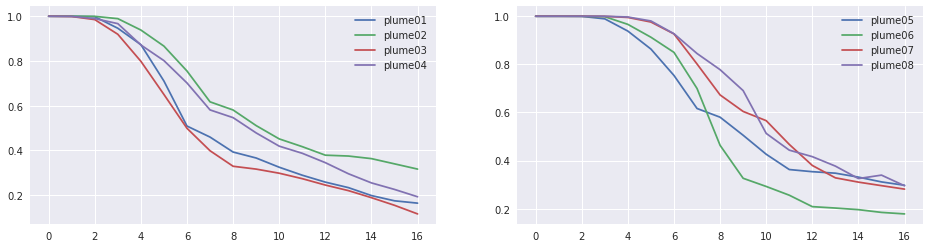

In [6]:
def plotVMR(logfile):
    varnames = ["plume0{0}".format(i) for i in range(1,9)]

    plt.figure(figsize=(16,4))

    plt.subplot(1,2,1)
    for varname in varnames[0:4]:
        maxVMR = extract_max(logfile,varname)
        plt.plot(maxVMR,label=varname)
    plt.legend()

    plt.subplot(1,2,2)
    for varname in varnames[4:8]:
        maxVMR = extract_max(logfile,varname)
        plt.plot(maxVMR,label=varname)
    plt.legend()
    
plotVMR("/u/jzhuang1/FV3/rundirs/C96/C96L160_std.log")

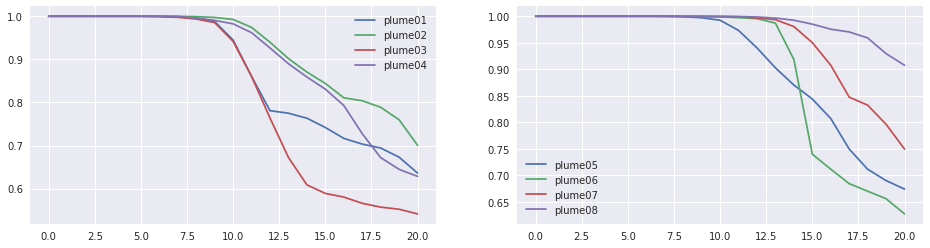

In [13]:
plotVMR("/u/jzhuang1/FV3/rundirs/C192/C192L160_std.log")